<a href="https://colab.research.google.com/github/YeonJaeHong/ESAA_homeworks/blob/main/10_9%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

227-251p 파이썬 머신러닝

XGBoost (extra gradient boost)
>xgboost는 gbm에 기반하고 있지만 gbm의 단점의 문제를 해결해서 각광을 받고 있다. 특히 과적합을 규제하고 분할을 가지치기 할 수 있으며 자체 내장된 교차 검증으로 지정된 반복 횟수가 아닌 교차 검증을 통해 평가 데이터 세트의 평가값이 최적화 된다
>>반복을 중간에 멈출 수 있는 조기 중단 기능이 있다.(num_rounds로 지정)
>>xgboost는 결손값을 자체 처리 할 수 있는 기능을 가지고 있다
>> 병렬 cpu 환경에서 병렬 학습이 가능해서 기존 gbm 보다 빠르게 학습할 수 있음

파이썬 래퍼 XGBOOST 하이퍼 파라미터를 유형별로 나눈다

>>일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없다 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭한다 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

>>주요 일반 파라미터 booster, silent, nthread 주유 부스터 파라미터 eta , num_boost_rounds, min_child_weight , gamma, max_depth, sub_sample

> eta [default=0.3, alias: learning_rate] : GBM의 학습률(learning rate)과 같은 파라미터이다. 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값, 파이썬 래퍼 기반의 xgboost를 이용할 경우 default는 0.3이고 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, default는 0.1이다. 보통은 0.01 ~ 0.2 사이의 값을 선호한다.
> num_boost_rounds : GBM의 n_estimators와 같은 파라미터이다.
> min_child_weight [default=1] : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합
> min_child_weight가 클수록 분할을 자제한다. 과적합을 조절하기 위해 사용된다.
> gamma [default=0, alias: min_split_loss] : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값이다. 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리한다. 값이 클수록 과적합 감소 효과가 있다.
> max_depth [default=6] : 트리 기반 알고리즘의 max_depth와 같다. 0을 지정하면 깊이에 제한이 없다. max_depth가 높으면 특정 피쳐 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용한다.
> sub_sample [default=1] : GBM의 subsample과 동일하다. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정한다. sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용한다. 0에서 1사이의 값이 가능하나 일반적으로 0.5 ~ 1 사이의 값을 사용한다.
> colsample_bytree [default=1] : GBM의 max_feature와 유사하다. 트리 생성에 필요한 피처(column)를 임의로 샘플링하는 데 사용된다. 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용하다.
> lambda [default=1, alias: reg_lambda] : L2 Regularation 적용 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
> alpha [default=0, alias: reg_alpha] : L1 Regularization 적용 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
> scale_pos_weight [default=1] : 특정 값으로 치우친 비대칭한 클래스로 구성된 datase의 균형을 유지하기 위한 파라미터이다.

과적합의 문제가 심각할 경우, eta 값을 낮추고, mat_depth 값을 낮추고 min_child_weight 값을 높이고 gamma 값을 높인다

파이썬 래퍼 xgboost 적용- 위스콘신 유방암 예측

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')


In [ ]:
dataset= load_breast_cancer()
x_features= dataset.data
y_label= dataset.target
cancer_df= pd.DataFrame(data=x_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
#전체 데이터중 80%는 학습용, 20%는 테스트용으로 추출
X_train,X_test,y_train,y_train=train_test_split(x_features,y_label,test_size=0.2,random_state=156)

파이썬 래퍼 xgboost 는 사이킷런과 가장 다른 점은 학습용과 테스트 용 데이터 세트를 위한 별도의 객체인 DMatrix를 생성한다는 것

In [ ]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

XGBoostError: ignored

파이썬 래퍼 XGBoost 모듈인 xgboost를 이용하여 학습을 수행하기 전에 먼저 하이퍼 파라미터를 설정해야한다. XGBoost의 hyper parameter는 주로 딕셔너리 형태로 입력한다. 그리고 조기 중단은 XGBoost가 수행 성능을 개선하기 위해서 더 이상 지표 개선이 없을 경우에 num_boost_round 횟수를 모두 채우지 않고 중간에 반복을 빠져 나올 수 있도록 하는 것이다. train() 함수에서 early_stopping_rounds 파라미터를 입력하여 조기 중단 할 수 있는 최소 반복 횟수를 설정할 수 있다. trian 함수의 evals를 이용해 학습이 반복될 때마다 표시된 dataset에 대한 평가 지표 결과가 출력된다.



In [ ]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'}
num_rounds = 400

# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다.
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

NameError: ignored

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

NameError: ignored

get_clf_eval() 함수를 적용해 모델의 예측 성능 평가

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test , preds, pred_probs)

NameError: ignored

xgboost의 plot_importance() API는 feature의 중요도를 막대그래프 형식으로 나타낸다. 기본 평가 지표로 f1 score를 기반으로 각 feature의 중요도를 나타낸다. 내장된 plot_importance() 이용 시 유의할 점은 xgboost 넘파이 기반의 feature 데이터로 학습 시 feature 명을 알 수 없으므로 f0, f1과 같이 feature 순서별로 f자 뒤에 순서를 붙여서 축에 나열해준다. (f0= 첫번째 피처, f1= 두번째 피처)

NameError: ignored

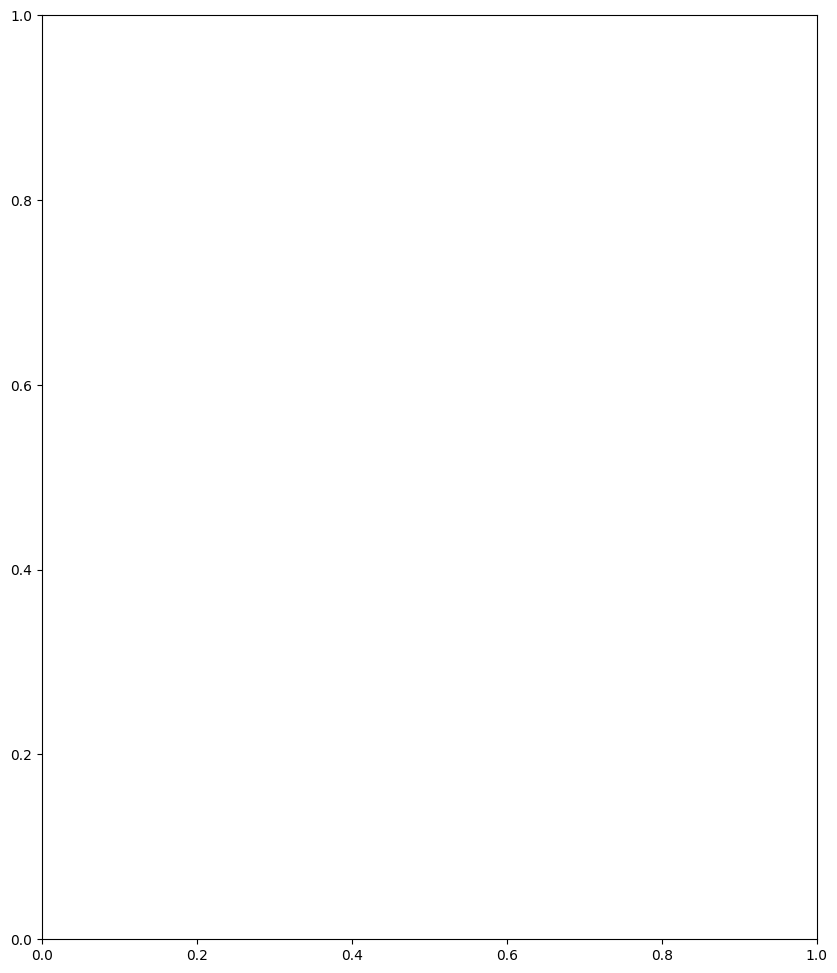

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

사이킷런 래퍼 XGBOOST의 개요 및 적용
>사이킷런 래퍼 XGBoost는 사이킷런의 기본 Estimator를 그대로 상속하여 만들었기 때문에 fit()과 predict()만으로 학습과 예측이 가능하고, 다른 유틸리티들도 사용 가능하다.
>> XGBoost의 하이퍼 파라미터에 약간의 차이존재
>> eta -> learning_rate
>> sub_sample -> subsample
>> lambda -> reg_lambda
>> alpha -> reg_alpha
>> 또한 xgboost의 n_estimator와 num_boost_round 파라미터는 동일한 파라미터

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , w_preds, w_pred_proba)

XGBoostError: ignored

In [ ]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

NameError: ignored

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

07. LightGBM
 > LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적고 메모리 사용량도 상대적으로 적다는 점
 > LightGBM의 한 가지 단점으로는 적은 dataset에 적용할 경우 과적합이 발생하기 쉽다는 것

 >>LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 분할(Leaf Wise) 방식을 사용.
 기존의 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할(Level Wise) 방식을 사용, 하지만 균형을 맞추기 위해 시간이 오래 걸린다는 단점이 있다. LightGBM의 리프 중심 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성되지만 최대 손실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightGBM의 작동원리.


LightGBM 하이퍼 파라미터
> 트리의 특성에 맞는 하이퍼 파라미터 설정이 필요


* num_iterations [default=100]: 반복 수행하려는 트리의 개수를 지정한다. 크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있다. 사이킷런 GBM과 XGBoost의 사이킷런 호환 클래스의 n_estimators와 같은 파라미터이므로 LightGBM의 사이킷런 호환 클래스에서는 num_iterations로 이름이 변경되었다.


*   learning_rate [default=0.1]: 0에서 1사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값이다. 일반적으로 n_estimators를 크게 하고 learning_rate를 작게 해서 예측 성능을 향상시킬 수 있으나, 마찬가지로 과적합 이슈와 학습 시간이 길어지는 부정적인 영향도 고려해야 한다. GBM, XGBoost의 learning_rate와 같은 파라미터이다.
*   max_depth [default=-1]: 트리 기반 알고리즘의 max_depth와 같다. 0보다 작은 값을 지정하면 깊이에 제한이 없다. 지금까지 소개한 Depth wise 방식의 트리와 다르게 LightGBM은 Leaf wise 기반이므로 깊이가 상대적으로 더 깊다.
min_data_in_leaf [default=20]:




min_data_in_leaf [default=20]: 결정 트리의 min_samples_leaf와 같은 파라미터이다. 하지만 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 min_child_samples 파라미터로 이름이 변경된다. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터이다.
num_leaves [default=31]: 하나의 트리가 가질 수 있는 최대 리프 개수이다.
boosting [default=gbdt]: 부스팅의 트리를 생성하는 알고리즘을 기술한다.
gbdt : 일반적인 그래디언트 부스팅 결정 트리
rf : 랜덤 포레스트
bagging_fraction [default=1.0]: 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정한다. 사이킷런의 GBM과 XGBClassifier의 subsample 파라미터와 동일하기에 사이킷런 래퍼 LightGBM인 LightGBMClassifier에서는 subsample로 동일하게 파라미터 이름이 변경된다.
feature_fraction [default=1.0]: 개별 트리를 학습할 때마다 무작위로 선택하는 feature의 비율이다. 과적합을 막기 위해 사용된다. GBM의 max_features와 유사하며, XGBClassifier의 colsample_bytree와 똑같으므로 LightGBM Classifier에서는 동일하게 colsample_bytree로 변경된다.
lambda_l2 [default=0.0]: L2 regulation 제어를 위한 값이다. feature 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다. XGBClassifier의 reg_lambda와 동일하므로 LightGBMClassifier에서는 reg_lambda로 변경된다.
lambda l1 [default=0.0]: L1 regulation 제어를 위한 값이다. L2와 마찬가지로 과적합 제어를 위한 것이며, XGBClassifier의 reg_alpha와 동일하므로 LightGBMClassifier에서는 reg_alpha로 변경된다.
Learning Task 파라미터
objective: 최솟값을 가져야 할 손실함수를 정의한다. Xgboost의 objective 파라미터와 동일하다. 애플리케이션 유형, 즉 회귀, 다중 클래스 분류, 이진 분류인지에 따라서 objective인 손실 함수가 지정된다.